In [303]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

# 1. Direct Initialization

In [304]:
num_levels = 2
a = qt.destroy(num_levels)

a1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels)])
a3 = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a])

In [305]:
omega_1 = 0 * 2 * np.pi
omega_2 = 0 * 2 * np.pi # 2pi MHz
omega_3 = 0 * 2 * np.pi

g_12 = 10 * 2 * np.pi # 2pi MHz
g_23 = g_12
g_13 = 15 * 2 * np.pi # 2pi MHz

H = omega_1 * a1.dag()*a1 + omega_2 * a2.dag()*a2 + omega_3 * a3.dag()*a3 
H += g_12*(a1*a2.dag() + a2*a1.dag()) + g_23*(a3*a2.dag() + a2*a3.dag()) + g_13*(a1*a3.dag() + a3*a1.dag())

In [306]:
times = np.linspace(0, 0.2, 1001)

### 1.1 Positive Coupling

### $\langle + |$ state posivite coupling

In [307]:
psi0 = 1/np.sqrt(2)*(qt.basis([num_levels, num_levels, num_levels], [1, 0, 0]) + qt.basis([num_levels, num_levels, num_levels], [0, 0, 1]))

result = qt.sesolve(H, psi0, times, e_ops=[a1.dag()*a1, a2.dag()*a2, a3.dag()*a3, a1.dag()*a1 + a2.dag()*a2 + a3.dag()*a3])

Q1 min: 0.11
Q1 max: 0.5
Q2 min: 0.0
Q2 max: 0.78
Q3 min: 0.11
Q3 max: 0.5


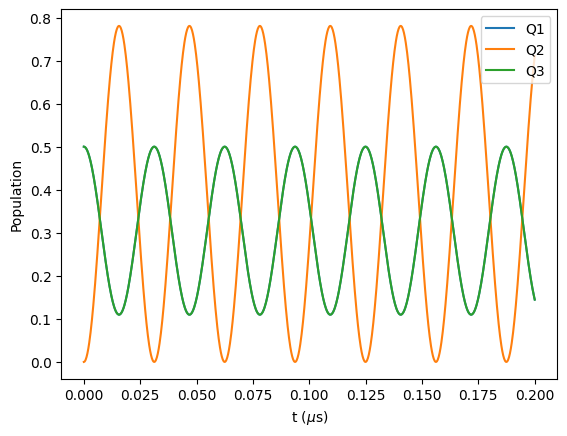

In [308]:
for i in range(len(result.expect)-1):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')
    
    print(f'Q{i+1} min: {np.round(np.min(result.expect[i]), 2)}')
    print(f'Q{i+1} max: {np.round(np.max(result.expect[i]), 2)}')


plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.legend()
plt.show()

### $\langle - |$ state posivite coupling

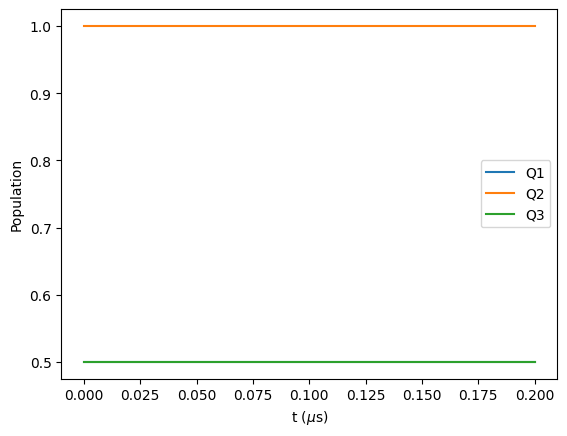

In [270]:
psi0 = 1/np.sqrt(2)*(qt.basis([num_levels, num_levels, num_levels], [1, 0, 0]) - qt.basis([num_levels, num_levels, num_levels], [0, 0, 1]))

result = qt.sesolve(H, psi0, times, e_ops=[a1*a1.dag(), a2*a2.dag(), a3*a3.dag(), a1*a1.dag()+a2*a2.dag()+a3*a3.dag()])

for i in range(len(result.expect)-1):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')


plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.legend()
plt.show()

### 1.2 Negative Coupling

### $\langle + |$ state negative coupling

In [271]:
omega_1 = 0 * 2 * np.pi
omega_2 = 0 * 2 * np.pi # 2pi MHz
omega_3 = 0 * 2 * np.pi

g_12 = 10 * 2 * np.pi # 2pi MHz
g_23 = g_12
g_13 = -15 * 2 * np.pi # 2pi MHz

H = omega_1 * a1.dag()*a1 + omega_2 * a2.dag()*a2 + omega_3 * a3.dag() *a3
H += g_12*(a1*a2.dag() + a2*a1.dag()) + g_23*(a3*a2.dag() + a2*a3.dag()) + g_13*(a1*a3.dag() + a3*a1.dag())

In [272]:
psi0 = 1/np.sqrt(2)*(qt.basis([num_levels, num_levels, num_levels], [1, 0, 0]) + qt.basis([num_levels, num_levels, num_levels], [0, 0, 1]))

result = qt.sesolve(H, psi0, times, e_ops=[a1*a1.dag(), a2*a2.dag(), a3*a3.dag(), a1*a1.dag()+a2*a2.dag()+a3*a3.dag()])

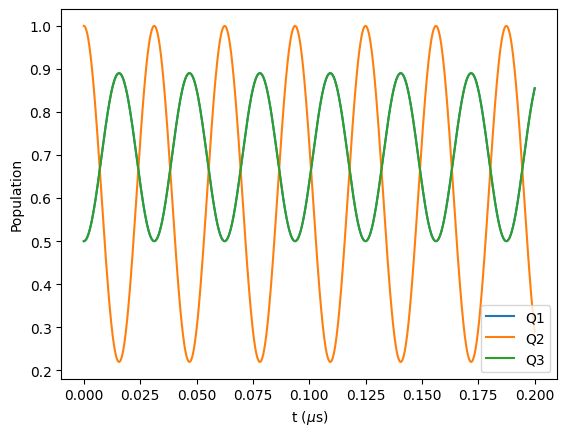

In [273]:
for i in range(len(result.expect)-1):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')


plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.legend()
plt.show()

Plus and minus states have the same dynamics for positive or negative coupling, but verify that their energies are different

In [274]:
omega_1 = 0 * 2 * np.pi
omega_2 = 0 * 2 * np.pi # 2pi MHz
omega_3 = 0 * 2 * np.pi

g_12 = 10 * 2 * np.pi # 2pi MHz
g_23 = g_12
g_13 = -15 * 2 * np.pi # 2pi MHz

H_plus = omega_1 * a1*a1.dag() + omega_2 * a2*a2.dag() + omega_3 * a3*a3.dag() 
H_plus += g_12*(a1*a2.dag() + a2*a1.dag()) + g_23*(a3*a2.dag() + a2*a3.dag()) + g_13*(a1*a3.dag() + a3*a1.dag())

H_minus = omega_1 * a1*a1.dag() + omega_2 * a2*a2.dag() + omega_3 * a3*a3.dag() 
H_minus += g_12*(a1*a2.dag() + a2*a1.dag()) + g_23*(a3*a2.dag() + a2*a3.dag()) - g_13*(a1*a3.dag() + a3*a1.dag())

In [275]:
psi0_plus = 1/np.sqrt(2)*(qt.basis([num_levels, num_levels, num_levels], [1, 0, 0]) + qt.basis([num_levels, num_levels, num_levels], [0, 0, 1]))
psi0_minus = 1/np.sqrt(2)*(qt.basis([num_levels, num_levels, num_levels], [1, 0, 0]) - qt.basis([num_levels, num_levels, num_levels], [0, 0, 1]))


In [276]:
print(qt.expect(H_plus, psi0_plus))
print(qt.expect(H_plus, psi0_minus))
print(qt.expect(H_minus, psi0_plus))
print(qt.expect(H_minus, psi0_minus))

-94.24777960769377
94.24777960769377
94.24777960769377
-94.24777960769377


# 2. Adiabtic Ramps

### 2.1 2 Qubit Ramps

In [277]:
num_levels = 2
a = qt.destroy(num_levels)

a1 = qt.tensor([a, qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a])


In [278]:
def H_2Q_linear_ramp(t, args):
    freq_start = args['freq_start']
    freq_end = args['freq_end']    
    
    t_start = args['t_start']
    duration = args['duration']

    if t < t_start:
        coeff = freq_start
    elif t > t_start + duration:
        coeff = freq_end
    else:
        coeff = (1-(t-t_start)/duration)*freq_start + (t-t_start)/duration*freq_end 
    
    return coeff

In [279]:
def H_2Q_linear_ramp_double(t, args):
    freq_start = args['freq_start']
    freq_end = args['freq_end']    
    
    t_start = args['t_start']
    duration_1 = args['duration_1']
    duration_2 = args['duration_2']

    if t < t_start:
        coeff = freq_start
    elif t <= t_start + duration_1:
        t_prime = t - t_start
        coeff = (1-t_prime/duration_1)*freq_start + t_prime/duration_1*freq_end
    elif t <= t_start + duration_1 + duration_2:
        coeff = freq_end
    elif t <= t_start + duration_1 + duration_2 + duration_1:
        t_prime = t - t_start - duration_1 - duration_2
        coeff = (1-t_prime/duration_1)*freq_end + t_prime/duration_1*freq_start
    return coeff

#### 2.1.1 Linear Single Ramp

In [280]:
omega_1 = 0 * 2 * np.pi
omega_2 = 0 * 2 * np.pi # 2pi MHz

g = 10 * 2 * np.pi # 2pi MHz

H_2Q_0 = omega_1 * a1.dag()*a1 + omega_2 * a2.dag()*a2 + g*(a1*a2.dag() + a2*a1.dag())

H_2Q = [H_2Q_0, [a2.dag()*a2, H_2Q_linear_ramp]]

In [281]:
1/(100*10**-6*10*2*np.pi*10**6)

0.00015915494309189532

In [282]:
args = {'freq_start': 1000 * 2 * np.pi,
        'freq_end': 0,
        't_start': 0.1,
        'duration': 100}

In [283]:
times = np.linspace(0, 200, 10001)
psi0 = qt.basis([num_levels, num_levels], [1, 0])

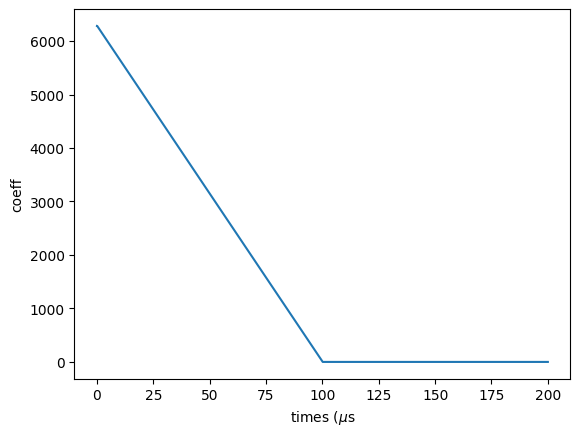

In [284]:
coeffs = np.zeros(len(times))
for i in range(len(times)):
    coeffs[i] = H_2Q_linear_ramp(times[i], args)
plt.plot(times, coeffs)
plt.xlabel('times ($\mu$s')
plt.ylabel('coeff')
plt.show()

In [285]:
result = qt.sesolve(H_2Q, psi0, times, e_ops=[a1.dag()*a1, a2.dag()*a2], args=args)

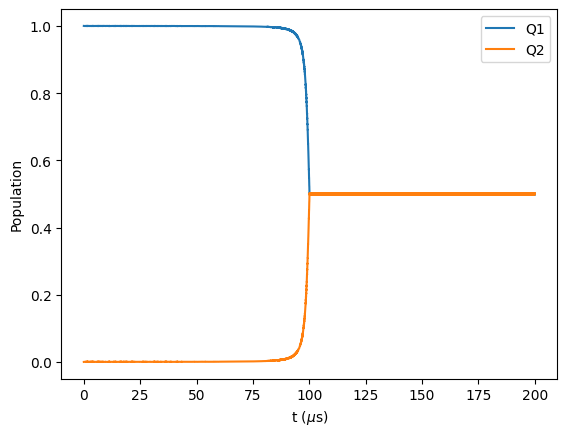

In [286]:
for i in range(len(result.expect)):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')


plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.legend()
plt.show()

#### 2.1.2 Linear Double Ramp

In [287]:
omega_1 = 0 * 2 * np.pi
omega_2 = 0 * 2 * np.pi # 2pi MHz

g = 10 * 2 * np.pi # 2pi MHz

H_2Q_0 = omega_1 * a1.dag()*a1 + omega_2 * a2.dag()*a2 + g*(a1*a2.dag() + a2*a1.dag())

H_2Q = [H_2Q_0, [a2.dag()*a2, H_2Q_linear_ramp_double]]

In [288]:
args = {'freq_start': 1000 * 2 * np.pi,
        'freq_end': 0,
        't_start': 0.1,
        'duration_1': 50,
        'duration_2': 0}

In [289]:
times = np.linspace(0, 100, 2001)
psi0 = qt.basis([num_levels, num_levels], [1, 0])

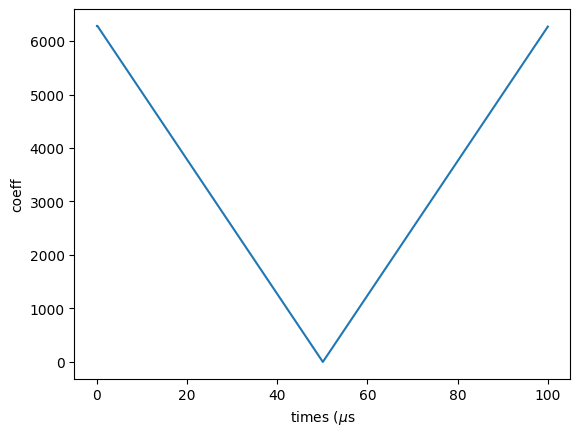

In [290]:
coeffs = np.zeros(len(times))
for i in range(len(times)):
    coeffs[i] = H_2Q_linear_ramp_double(times[i], args)
plt.plot(times, coeffs)
plt.xlabel('times ($\mu$s')
plt.ylabel('coeff')
plt.show()

In [291]:
result = qt.sesolve(H_2Q, psi0, times, args=args)

In [292]:
overlaps = np.zeros(len(result.states), dtype='complex')
for i in range(len(result.states)):
    overlaps[i] = result.states[i].overlap(psi0)



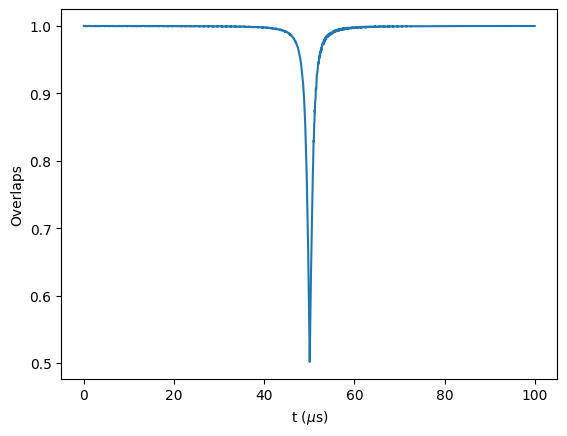

In [293]:
plt.plot(times, np.power(np.abs(overlaps), 2))
    
plt.xlabel('t ($\mu$s)')
plt.ylabel('Overlaps')

plt.show()

#### 2.1.3 Cubic Single Ramp

In [294]:
def H_2Q_cubic_ramp(t, args):
    freq_start = args['freq_start']
    freq_end = args['freq_end']    
    
    t_start = args['t_start']
    duration = args['duration']

    if t < t_start:
        coeff = freq_start
    elif t > t_start + duration:
        coeff = freq_end
    else:
        t_prime = t - t_start - duration
        coeff = (freq_end - freq_start)*np.power(t_prime/duration, 3) + freq_end
    
    return coeff

In [295]:
omega_1 = 0 * 2 * np.pi
omega_2 = 0 * 2 * np.pi # 2pi MHz

g = 10 * 2 * np.pi # 2pi MHz

H_2Q_0 = omega_1 * a1.dag()*a1 + omega_2 * a2.dag()*a2 + g*(a1*a2.dag() + a2*a1.dag())

H_2Q = [H_2Q_0, [a2.dag()*a2, H_2Q_cubic_ramp]]

In [296]:
args = {'freq_start': 1000 * 2 * np.pi,
        'freq_end': 0,
        't_start': 0.1,
        'duration': 20}

In [297]:
times = np.linspace(0, 100, 2001)
psi0 = qt.basis([num_levels, num_levels], [1, 0])

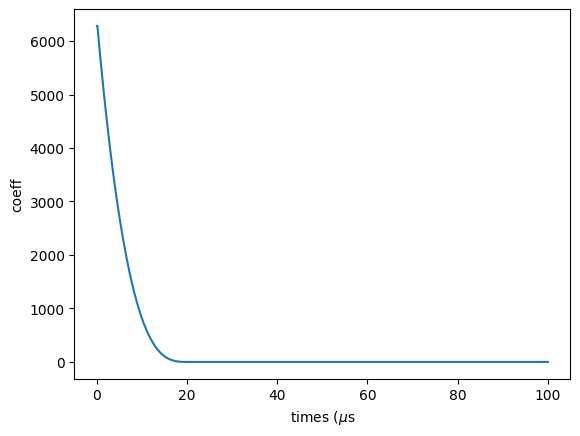

In [298]:
coeffs = np.zeros(len(times))
for i in range(len(times)):
    coeffs[i] = H_2Q_cubic_ramp(times[i], args)
plt.plot(times, coeffs)
plt.xlabel('times ($\mu$s')
plt.ylabel('coeff')
plt.show()

In [299]:
result = qt.sesolve(H_2Q, psi0, times, e_ops=[a1.dag()*a1, a2.dag()*a2], args=args)

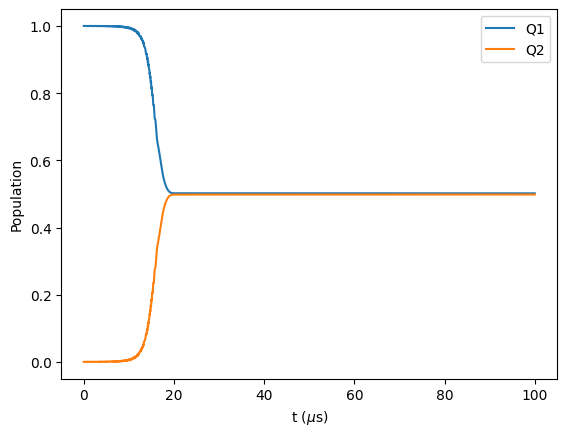

In [300]:
for i in range(len(result.expect)):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')


plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.legend()
plt.show()

### 2.1.4 Cubic Double Ramp

In [301]:
def H_2Q_linear_ramp_double(t, args):
    freq_start = args['freq_start']
    freq_end = args['freq_end']    
    
    t_start = args['t_start']
    duration_1 = args['duration_1']
    duration_2 = args['duration_2']

    if t < t_start:
        coeff = freq_start
    elif t <= t_start + duration_1:
        t_prime = t - t_start
        coeff = (1-t_prime/duration_1)*freq_start + t_prime/duration_1*freq_end
    elif t <= t_start + duration_1 + duration_2:
        coeff = freq_end
    elif t <= t_start + duration_1 + duration_2 + duration_1:
        t_prime = t - t_start - duration_1 - duration_2
        coeff = (1-t_prime/duration_1)*freq_end + t_prime/duration_1*freq_start
    return coeff